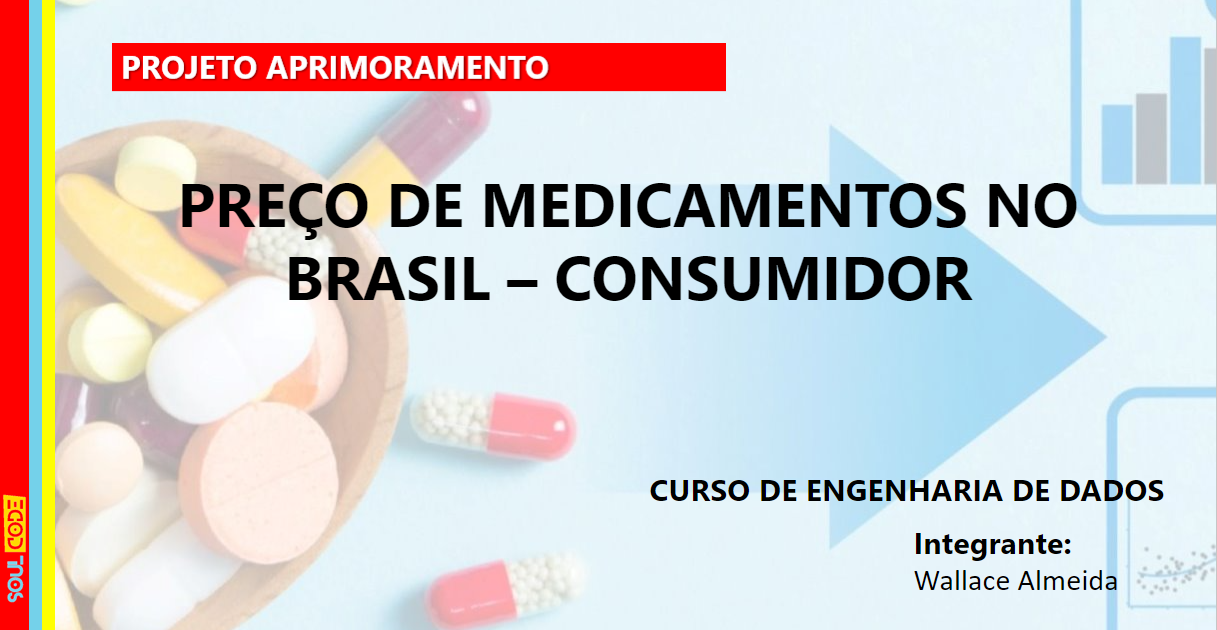

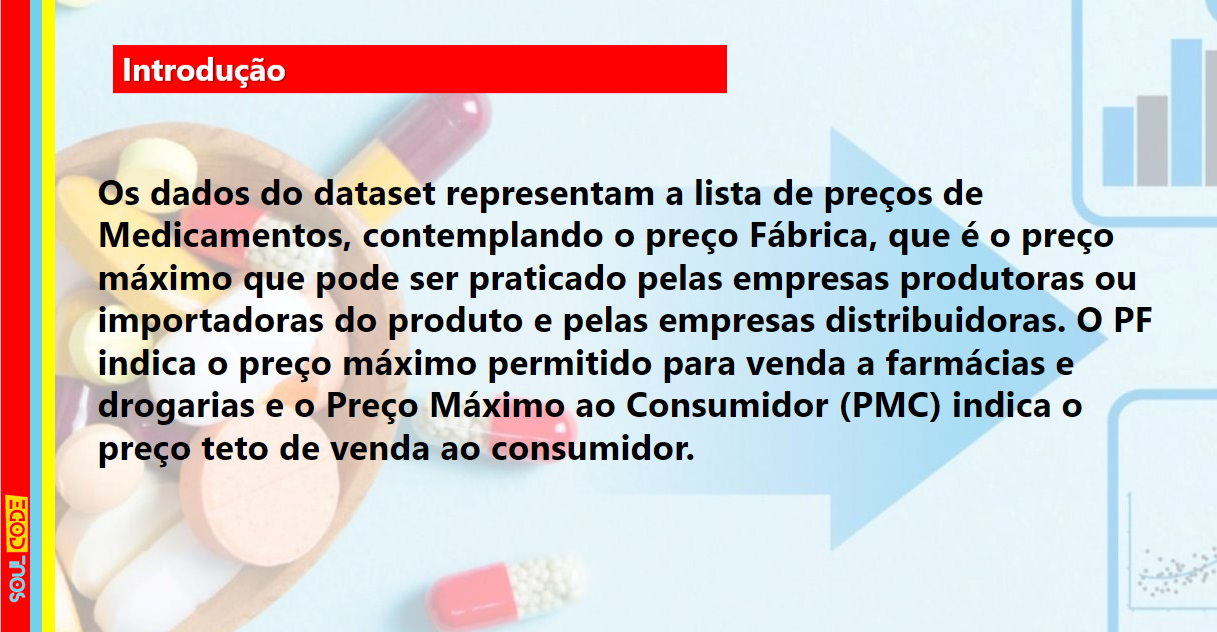

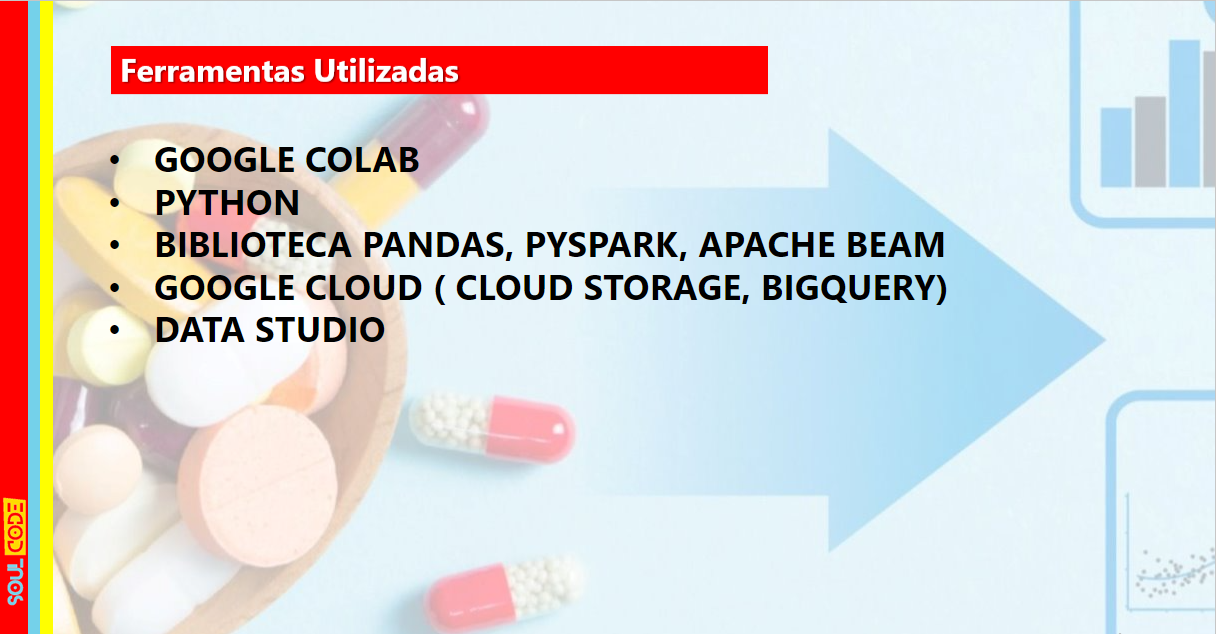

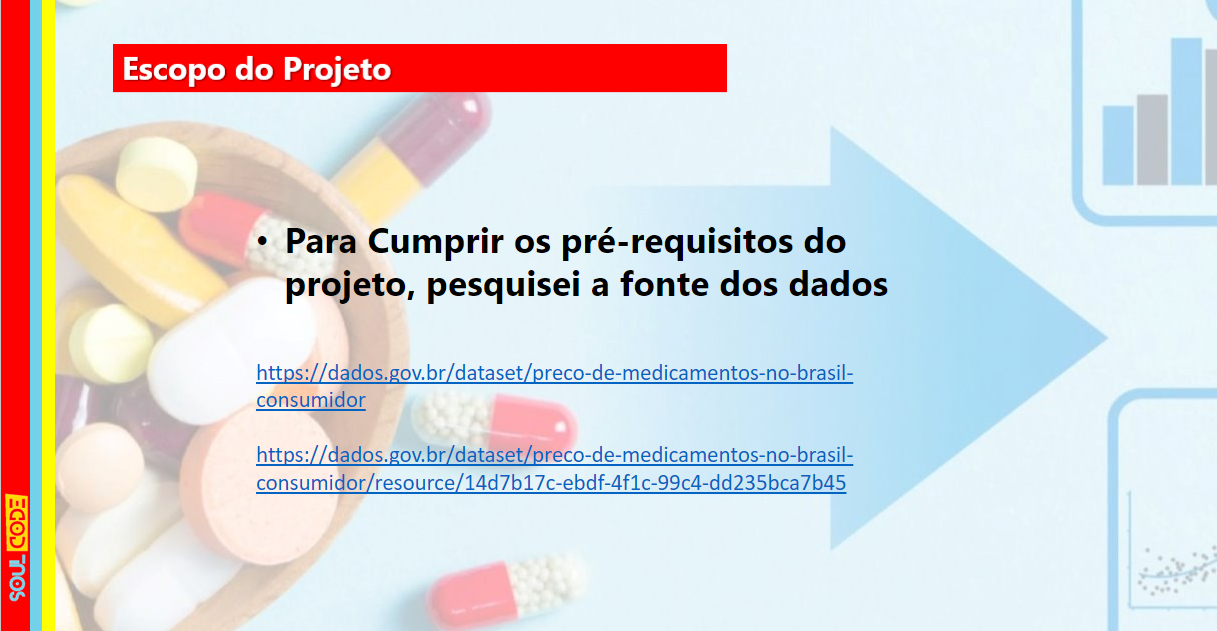

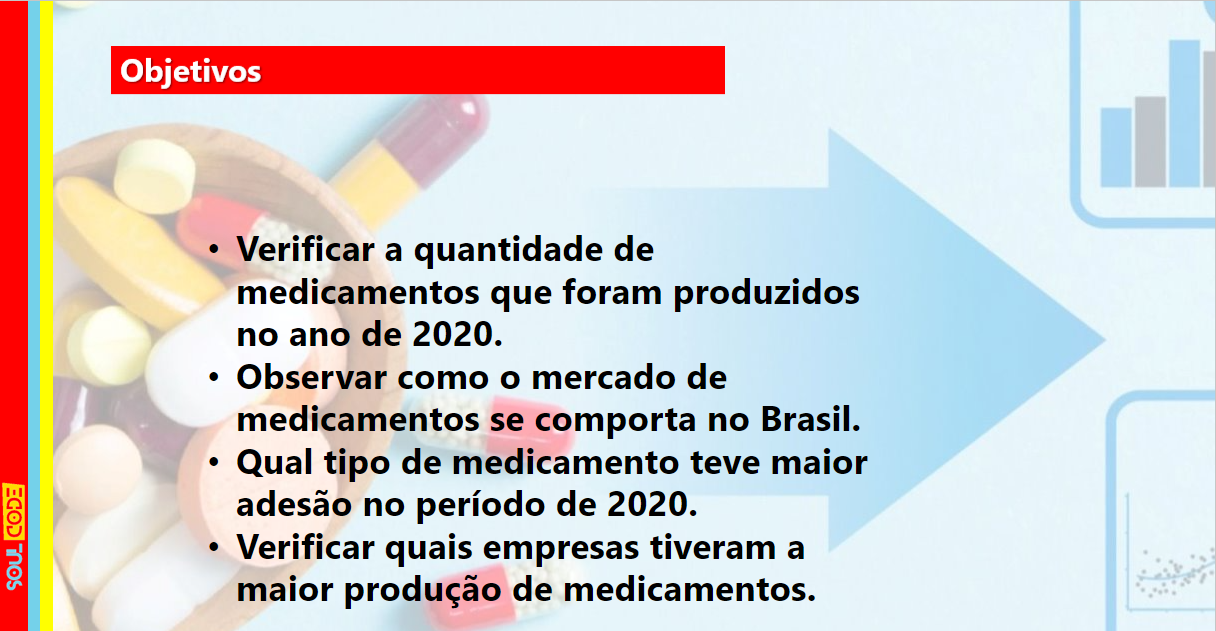

#<font color='red'> Parte I da ETL, Nível Pandas</font>

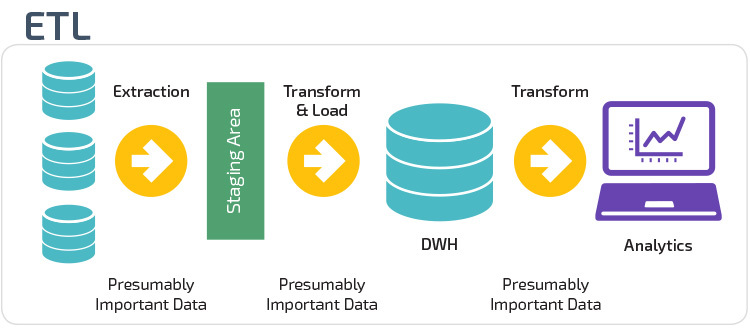



#<font color='red'>Fazendo a Extração, leitura do arquivo e criação do Dataframe</font>


<font color='Dark red'>Importando a Biblioteca Pandas</font>

In [1]:
import pandas as pd
import numpy as np

<font color='Dark red'>Lendo, criando e visualizando o Dataframe</font>

In [2]:
df = pd.read_csv("/content/preco_medicamento.csv", sep=";", encoding='latin-1')
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SUBSTÂNCIA,CNPJ,LABORATÓRIO,CÓDIGO GGREM,REGISTRO,EAN 1,EAN 2,EAN 3,PRODUTO,APRESENTAÇÃO,CLASSE TERAPÊUTICA,TIPO DE PRODUTO (STATUS DO PRODUTO),REGIME DE PREÇO,PF Sem Impostos,PF 0%,PF 12%,PF 17%,PF 17% ALC,"PF 17,5%","PF 17,5% ALC",PF 18%,PF 18% ALC,PF 20%,PMC 0%,PMC 12%,PMC 17%,PMC 17% ALC,"PMC 17,5%","PMC 17,5% ALC",PMC 18%,PMC 18% ALC,PMC 20%,RESTRIÇÃO HOSPITALAR,CAP,CONFAZ 87,ICMS 0%,ANÁLISE RECURSAL,LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS),COMERCIALIZAÇÃO 2020,TARJA
0,SALICILATO DE FENILA;ÁCIDO SALICÍLICO;ÓXIDO DE...,33.379.884/0001-96,LABORATORIO SIMOES LTDA.,520500901178410,57600510011,7896210500354,-,-,TALCO ALÍVIO,TALQUEIRA C/ 100 G,D10A - ANTIACNEICOS TÓPICOS,Similar,Regulado,"5,04","5,65","6,53","6,98","6,08","7,03","6,11","7,08","6,15","7,29","7,58","8,72","9,30","8,41","9,37","8,45","9,43","8,50","9,70",Não,Não,Não,Não,NaN,Negativa,Não,Tarja -(*)
1,DIENOGESTE;VALERATO DE ESTRADIOL,56.990.534/0001-67,SCHERING DO BRASIL QUÍMICA E FARMACÊUTICA LTDA,530917060013104,1002001390025,7896116871497,-,-,CHARMELIE,COM REV A + COM REV B + COM REV C + COM REV D ...,G3A4 - PREPARAÇÕES CONTRACEPTIVAS TRIFÁSICAS,Similar,Regulado,"96,83","108,45","125,32","134,01","116,66","134,95","117,37","135,90","118,09","139,83","145,48","167,40","178,63","161,28","179,84","162,26","181,06","163,25","186,12",Não,Não,Não,Não,NaN,Negativa,Não,Tarja Vermelha(*)
2,HIDROCLOROTIAZIDA;MALEATO DE ENALAPRIL,45.987.013/0001-34,ORGANON FARMACÊUTICA LTDA.,525500402113310,1002900020141,7897337705905,-,-,CO-RENITEC,"20 MG + 12,5 MG COM CT BL AL/AL X 30",C9B1 - INIBIDORES DA ECA ASSOCIADOS A ANTI-HIP...,Novo,Regulado,"43,76","43,76","49,73","52,72","52,72","53,04","53,04","53,37","53,37","54,70","60,50","68,75","72,88","72,88","73,32","73,32","73,78","73,78","75,62",Não,Não,Não,Não,NaN,Positiva,Não,Tarja Vermelha
3,HIDROCLOROTIAZIDA;MALEATO DE ENALAPRIL,45.987.013/0001-34,ORGANON FARMACÊUTICA LTDA.,525500401117312,1002900020158,7897337705912,-,-,CO-RENITEC,10 MG + 25 MG COM CT BL AL/AL X 30,C9B1 - INIBIDORES DA ECA ASSOCIADOS A ANTI-HIP...,Novo,Regulado,"28,74","28,74","32,66","34,63","34,63","34,84","34,84","35,05","35,05","35,93","39,73","45,15","47,87","47,87","48,16","48,16","48,45","48,45","49,67",Não,Não,Não,Não,NaN,Positiva,Não,Tarja Vermelha
4,MONTELUCASTE,45.987.013/0001-34,ORGANON FARMACÊUTICA LTDA.,525502006118219,1002900050014,7897337706575,-,-,SINGULAIR,5 MG COM MAST CT 3 BL AL PLAS INC X 10,R3J2 - ANTIASMÁTICOS/DPOC ANTILEUCOTRIENOS SIS...,Novo,Regulado,"44,67","44,67","50,76","53,82","53,82","54,15","54,15","54,48","54,48","55,84","61,75","70,17","74,40","74,40","74,86","74,86","75,32","75,32","77,20",Não,Não,Não,Não,NaN,Positiva,Sim,Tarja Vermelha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26305,CLORIDRATO DE SEVELÂMER,13.078.518/0001-90,FUNDAÇÃO BAIANA DE PESQ. CIENTIFICA E DESENV. ...,544018120000706,1988300020011,7898604730033,-,-,CLORIDRATO DE SEVELAMER,800 MG COM REV CT FR PLAS OPC X 180,V3G2 - PRODUTOS PARA HIPERFOSFATEMIA,Genérico,Regulado,"503,12","563,50",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sim,Sim,Sim,Sim,NaN,Negativa,Não,Tarja Vermelha(*)
26306,INSULINA HUMANA,13.078.518/0001-90,FUNDAÇÃO BAIANA DE PESQ. CIENTIFICA E DESENV. ...,544018060000307,1988300040012,7898604730064,-,-,BAHIAFARMA INSULINA HUMANA NPH,100 UI/ML SUS INJ CT FA VD INC X 10 ML,A10C2 - INSULINA HUMANA + ANÁLOGOS DE AÇÃO NORMAL,Biológicos,Regulado,"32,80","32,80",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"45,34",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não,Sim,Sim,Sim,NaN,Positiva,Sim,Tarja Vermelha(*)
26307,INSULINA HUMANA,13.078.518/0001-90,FUNDAÇÃO BAIANA DE PESQ. CIENTIFICA E DESENV. ...,544018070000407,1988300050018,7898604730071,-,-,BAHIAFARMA INSULINA HUMANA R,100 UI/ML SOL INJ CT FA VD INC X 10 ML,"A10C1 - INSULINA HUMANA E ANÁLOGOS, DE AÇÃO RÁ...",Biológicos,Regulado,"34,22","34,22",NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

<font color='Dark red'>Criando um backup para o dataframe</font>

In [3]:
dfbackup = df

<font color='Dark red'>Renomeando e corrigindo os cabeçarios das colunas</font>

In [4]:

dfbackup.rename(columns={
    'SUBSTÂNCIA':'SUBSTANCIA',
    'LABORATÓRIO':'LABORATORIO',
    'APRESENTAÇÃO':'APRESENTACAO',
    'CÓDIGO GGREM':'CODIGO_GGREM',
    'EAN 1':'EAN_1',
    'EAN 2':'EAN_2',
    'EAN 3':'EAN_3',
    'CLASSE TERAPÊUTICA':'CLASSE_TERAPEUTICA',
    'TIPO DE PRODUTO (STATUS DO PRODUTO)':'TIPO_DE_PRODUTO',
    'REGIME DE PREÇO':'REGIME_DE_PRECO',
    'PF Sem Impostos':'PF_Sem_Impostos',
    'PF 0%':'PF_0',
    'PF 12%':'PF_12',
    'PF 17%':'PF_17',
    'PF 17% ALC':'PF_17_ALC',
    'PF 17,5%':'PF_17,5',
    'PF 17,5% ALC':'PF_17,5_ALC',
    'PF 18%':'PF_18',
    'PF 18% ALC':'PF_18_ALC',
    'PF 20%':'PF_20',
    'PMC 0%':'PMC_0',
    'PMC 12%':'PMC_12',
    'PMC 17%':'PMC_17',
    'PMC 17% ALC':'PMC_17_ALC',
    'PMC 17,5%':'PMC_17,5',
    'PMC 17,5% ALC':'PMC_17,5_ALC',
    'PMC 18%':'PMC_18',
    'PMC 18% ALC':'PMC_18_ALC',
    'PMC 20%':'PMC_20',
    'RESTRIÇÃO HOSPITALAR':'RESTRICAO_HOSPITALAR',
    'CONFAZ 87':'CONFAZ_87',
    'ICMS 0%':'ICMS_0',
    'LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS)':'LISTA_CONCESSAO_CREDITO_TRIBUTARIO',
    'COMERCIALIZAÇÃO 2020':'COMERCIALIZACAO_2020',
    'ANÁLISE RECURSAL':'ANALISE_RECURSAL',
}, inplace=True)


<font color='Dark red'>Verificação Das Colunas </font>

In [5]:
dfbackup.columns

Index(['SUBSTANCIA', 'CNPJ', 'LABORATORIO', 'CODIGO_GGREM', 'REGISTRO',
       'EAN_1', 'EAN_2', 'EAN_3', 'PRODUTO', 'APRESENTACAO',
       'CLASSE_TERAPEUTICA', 'TIPO_DE_PRODUTO', 'REGIME_DE_PRECO',
       'PF_Sem_Impostos', 'PF_0', 'PF_12', 'PF_17', 'PF_17_ALC', 'PF_17,5',
       'PF_17,5_ALC', 'PF_18', 'PF_18_ALC', 'PF_20', 'PMC_0', 'PMC_12',
       'PMC_17', 'PMC_17_ALC', 'PMC_17,5', 'PMC_17,5_ALC', 'PMC_18',
       'PMC_18_ALC', 'PMC_20', 'RESTRICAO_HOSPITALAR', 'CAP', 'CONFAZ_87',
       'ICMS_0', 'ANALISE_RECURSAL', 'LISTA_CONCESSAO_CREDITO_TRIBUTARIO',
       'COMERCIALIZACAO_2020', 'TARJA'],
      dtype='object')

<font color='Dark red'>Verificando existencia de dado duplicados e somando caso exista </font>

In [6]:
dfbackup.duplicated().sum()

0

<font color='Dark red'>Criando o novo backup </font>

In [7]:
dfbackup2 = dfbackup

<font color='Dark red'>Modificando os dados inconscistentes na coluna Tarja_Remedios </font>

In [8]:
dfbackup2['TARJA_REMEDIOS'] = dfbackup['TARJA'].apply(lambda x: x.replace('Tarja -(*)', 'Tarja Livre'
).replace('Tarja Vermelha(*)', 'Tarja Vermelha').replace('- (*)', 'Tarja Livre').replace('Tarja Preta(*)', 'Tarja Preta'
).replace('Tarja Venda Livre/Sem Tarja (*)', 'Tarja Livre').replace('Vermelha (*)', 'Tarja Vermelha').replace('  ', ''))

<font color='Dark red'>Dropando as colunas Analise recursal, EAN_2, EAN_3 por não conterem informações relevantes para as analises e a coluna TARJA por ter criando uma nova coluna tratada
 </font>

In [ ]:
dfbackup2.drop('ANALISE_RECURSAL', axis=1, inplace=True)
dfbackup2.drop('CODIGO_GGREM', axis=1, inplace=True)
dfbackup2.drop('EAN_2', axis=1, inplace=True)
dfbackup2.drop('EAN_3', axis=1, inplace=True)
dfbackup2.drop('TARJA', axis=1, inplace=True)

<font color='Dark red'> Mudando as colunas com valores NaN, setando como 0 </font>

In [10]:
dfbackup2 = dfbackup2.fillna('0.0')

<font color='Dark red'>Fazendo a mudança dos dados de ',' para '.' para que enseguida transformar os dados em float </font>

In [11]:
dfbackup2['PF_0'] = dfbackup2['PF_0'].apply(lambda x: x.replace(',', '.'))
dfbackup2['PF_Sem_Impostos'] = dfbackup2['PF_Sem_Impostos'].apply(lambda x: x.replace(',', '.'))
dfbackup2['PF_12'] = dfbackup2['PF_12'].apply(lambda x: x.replace(',', '.'))
dfbackup2['PF_17'] = dfbackup2['PF_17'].apply(lambda x: x.replace(',', '.'))
dfbackup2['PF_17_ALC'] = dfbackup2['PF_17_ALC'].apply(lambda x: x.replace(',', '.'))
dfbackup2['PF_17,5'] = dfbackup2['PF_17,5'].apply(lambda x: x.replace(',', '.'))
dfbackup2['PF_17,5_ALC'] = dfbackup2['PF_17,5_ALC'].apply(lambda x: x.replace(',', '.'))
dfbackup2['PF_18'] = dfbackup2['PF_18'].apply(lambda x: x.replace(',', '.'))
dfbackup2['PF_18_ALC'] = dfbackup2['PF_18_ALC'].apply(lambda x: x.replace(',', '.'))
dfbackup2['PF_20'] = dfbackup2['PF_20'].apply(lambda x: x.replace(',', '.'))
dfbackup2['PMC_0'] = dfbackup2['PMC_0'].apply(lambda x: x.replace(',', '.'))
dfbackup2['PMC_12'] = dfbackup2['PMC_12'].apply(lambda x: x.replace(',', '.'))
dfbackup2['PMC_17'] = dfbackup2['PMC_17'].apply(lambda x: x.replace(',', '.'))
dfbackup2['PMC_17_ALC'] = dfbackup2['PMC_17_ALC'].apply(lambda x: x.replace(',', '.'))
dfbackup2['PMC_17,5'] = dfbackup2['PMC_17,5'].apply(lambda x: x.replace(',', '.'))
dfbackup2['PMC_17,5_ALC'] = dfbackup2['PMC_17,5_ALC'].apply(lambda x: x.replace(',', '.'))
dfbackup2['PMC_18'] = dfbackup2['PMC_18'].apply(lambda x: x.replace(',', '.'))
dfbackup2['PMC_18_ALC'] = dfbackup2['PMC_18_ALC'].apply(lambda x: x.replace(',', '.'))
dfbackup2['PMC_20'] = dfbackup2['PMC_20'].apply(lambda x: x.replace(',', '.'))


<font color='Dark red'>Mundando os tipo de dados para float com o numpy </font>

In [12]:
dfbackup2['PF_Sem_Impostos'] = dfbackup2['PF_Sem_Impostos'].astype(np.float)
dfbackup2['PF_0'] = dfbackup2['PF_0'].astype(np.float)
dfbackup2['PF_12'] = dfbackup2['PF_12'].astype(np.float)
dfbackup2['PF_17'] = dfbackup2['PF_17'].astype(np.float)
dfbackup2['PF_17_ALC'] = dfbackup2['PF_17_ALC'].astype(np.float)
dfbackup2['PF_17,5'] = dfbackup2['PF_17,5'].astype(np.float)
dfbackup2['PF_17,5_ALC'] = dfbackup2['PF_17,5_ALC'].astype(np.float)
dfbackup2['PF_18'] = dfbackup2['PF_18'].astype(np.float)
dfbackup2['PF_18_ALC'] = dfbackup2['PF_18_ALC'].astype(np.float)
dfbackup2['PF_20'] = dfbackup2['PF_20'].astype(np.float)
dfbackup2['PMC_0'] = dfbackup2['PMC_0'].astype(np.float)
dfbackup2['PMC_12'] = dfbackup2['PMC_12'].astype(np.float)
dfbackup2['PMC_17'] = dfbackup2['PMC_17'].astype(np.float)
dfbackup2['PMC_17_ALC'] = dfbackup2['PMC_17_ALC'].astype(np.float)
dfbackup2['PMC_17,5'] = dfbackup2['PMC_17,5'].astype(np.float)
dfbackup2['PMC_17,5_ALC'] = dfbackup2['PMC_17,5_ALC'].astype(np.float)
dfbackup2['PMC_18'] = dfbackup2['PMC_18'].astype(np.float)
dfbackup2['PMC_18_ALC'] = dfbackup2['PMC_18_ALC'].astype(np.float)
dfbackup2['PMC_20'] = dfbackup2['PMC_20'].astype(np.float)

<font color='Dark red'>Visualizando o dataframe com os tratamentos e limpezas </font>

In [13]:
dfbackup2

,SUBSTANCIA,CNPJ,LABORATORIO,REGISTRO,EAN_1,PRODUTO,APRESENTACAO,CLASSE_TERAPEUTICA,TIPO_DE_PRODUTO,REGIME_DE_PRECO,PF_Sem_Impostos,PF_0,PF_12,PF_17,PF_17_ALC,"PF_17,5","PF_17,5_ALC",PF_18,PF_18_ALC,PF_20,PMC_0,PMC_12,PMC_17,PMC_17_ALC,"PMC_17,5","PMC_17,5_ALC",PMC_18,PMC_18_ALC,PMC_20,RESTRICAO_HOSPITALAR,CAP,CONFAZ_87,ICMS_0,LISTA_CONCESSAO_CREDITO_TRIBUTARIO,COMERCIALIZACAO_2020,TARJA_REMEDIOS
0,SALICILATO DE FENILA;ÁCIDO SALICÍLICO;ÓXIDO DE...,33.379.884/0001-96,LABORATORIO SIMOES LTDA.,57600510011,7896210500354,TALCO ALÍVIO,TALQUEIRA C/ 100 G,D10A - ANTIACNEICOS TÓPICOS,Similar,Regulado,5.04,5.65,6.53,6.98,6.08,7.03,6.11,7.08,6.15,7.29,7.58,8.72,9.30,8.41,9.37,8.45,9.43,8.50,9.70,Não,Não,Não,Não,Negativa,Não,Tarja Livre
1,DIENOGESTE;VALERATO DE ESTRADIOL,56.990.534/0001-67,SCHERING DO BRASIL QUÍMICA E FARMACÊUTICA LTDA,1002001390025,7896116871497,CHARMELIE,COM REV A + COM REV B + COM REV C + COM REV D ...,G3A4 - PREPARAÇÕES CONTRACEPTIVAS TRIFÁSICAS,Similar,Regulado,96.83,108.45,125.32,134.01,116.66,134.95,117.37,135.90,118.09,139.83,145.48,167.40,178.63,161.28,179.84,162.26,181.06,163.25,186.12,Não,Não,Não,Não,Negativa,Não,Tarja Vermelha
2,HIDROCLOROTIAZIDA;MALEATO DE ENALAPRIL,45.987.013/0001-34,ORGANON FARMACÊUTICA LTDA.,1002900020141,7897337705905,CO-RENITEC,"20 MG + 12,5 MG COM CT BL AL/AL X 30",C9B1 - INIBIDORES DA ECA ASSOCIADOS A ANTI-HIP...,Novo,Regulado,43.76,43.76,49.73,52.72,52.72,53.04,53.04,53.37,53.37,54.70,60.50,68.75,72.88,72.88,73.32,73.32,73.78,73.78,75.62,Não,Não,Não,Não,Positiva,Não,TarjaVermelha
3,HIDROCLOROTIAZIDA;MALEATO DE ENALAPRIL,45.987.013/0001-34,ORGANON FARMACÊUTICA LTDA.,1002900020158,7897337705912,CO-RENITEC,10 MG + 25 MG COM CT BL AL/AL X 30,C9B1 - INIBIDORES DA ECA ASSOCIADOS A ANTI-HIP...,Novo,Regulado,28.74,28.74,32.66,34.63,34.63,34.84,34.84,35.05,35.05,35.93,39.73,45.15,47.87,47.87,48.16,48.16,48.45,48.45,49.67,Não,Não,Não,Não,Positiva,Não,TarjaVermelha
4,MONTELUCASTE,45.987.013/0001-34,ORGANON FARMACÊUTICA LTDA.,1002900050014,7897337706575,SINGULAIR,5 MG COM MAST CT 3 BL AL PLAS INC X 10,R3J2 - ANTIASMÁTICOS/DPOC ANTILEUCOTRIENOS SIS...,Novo,Regulado,44.67,44.67,50.76,53.82,53.82,54.15,54.15,54.48,54.48,55.84,61.75,70.17,74.40,74.40,74.86,74.86,75.32,75.32,77.20,Não,Não,Não,Não,Positiva,Sim,TarjaVermelha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26305,CLORIDRATO DE SEVELÂMER,13.078.518/0001-90,FUNDAÇÃO BAIANA DE PESQ. CIENTIFICA E DESENV. ...,1988300020011,7898604730033,CLORIDRATO DE SEVELAMER,800 MG COM REV CT FR PLAS OPC X 180,V3G2 - PRODUTOS PARA HIPERFOSFATEMIA,Genérico,Regulado,503.12,563.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Sim,Sim,Sim,Sim,Negativa,Não,Tarja Vermelha
26306,INSULINA HUMANA,13.078.518/0001-90,FUNDAÇÃO BAIANA DE PESQ. CIENTIFICA E DESENV. ...,1988300040012,7898604730064,BAHIAFARMA INSULINA HUMANA NPH,100 UI/ML SUS INJ CT FA VD INC X 10 ML,A10C2 - INSULINA HUMANA + ANÁLOGOS DE AÇÃO NORMAL,Biológicos,Regulado,32.80,32.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,45.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Não,Sim,Sim,Sim,Positiva,Sim,Tarja Vermelha
26307,INSULINA HUMANA,13.078.518/0001-90,FUNDAÇÃO BAIANA DE PESQ. CIENTIFICA E DESENV. ...,1988300050018,7898604730071,BAHIAFARMA INSULINA HUMANA R,100 UI/ML SOL INJ CT FA VD INC X 10 ML,"A10C1 - INSULINA HUMANA E ANÁLOGOS, DE AÇÃO RÁ...",Biológicos,Regulado,34.22,34.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,47.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Não,Sim,Sim,Sim,Positiva,Sim,TarjaVermelha
26308,ISOCONAZOL;ABARELIX,33.683.202/0001-34,VISA ESTADUAL SP TESTE,9965400350064,2124165465465,PRODUTO DE MEDICAMENTO PARA TESTE,APRESENTAÇÃO 01&nbsp;03,R3C1 - ANTIASMÁTICOS/DPOC ANTIINFLAMATORIOS NÃ...,Fitoterápico,Regulado,7.32,8.20,9.48,10.13,8.82,10.20,8.87,10.28,8.93,10.57,11.00,12.66,13.50,12.19,13.59,12.26,13.70,12.35,14.07,Não,Não,Sim,Não,Negativa,Não,TarjaVermelha


<font color='Dark red'>Na coluna Tipo de produto existia 2 dados inconsistente, modifiquei para dados corretos </font>

In [14]:
dfbackup2['TIPO_DE_PRODUTO'] = dfbackup['TIPO_DE_PRODUTO'].apply(lambda x: x.replace('-(*)', 'Biológico Novo'
).replace('0', 'Radiofármaco').replace('Biológicos', 'Biológico'))

<font color='Dark red'>Plotagem da colunas Tipos de Produtos por Quantidade</font>

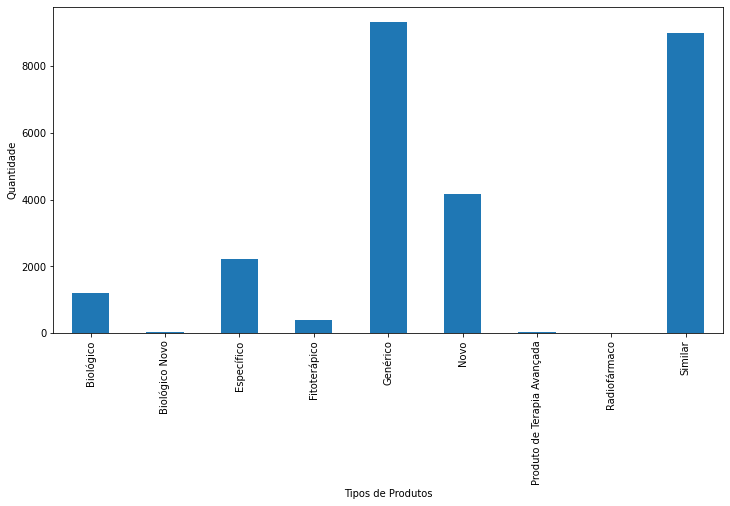

In [15]:
dfbackup2.groupby(['TIPO_DE_PRODUTO']).size().plot.bar(figsize=(12,6),xlabel='Tipos de Produtos',ylabel='Quantidade')

<font color='Dark red'>Agreguei os dados por tipo de medicamentos e retornando a quantidade de cada tipo</font>

In [16]:
dfbackup2.groupby(['TIPO_DE_PRODUTO']).size()

TIPO_DE_PRODUTO
Biológico                      1191
Biológico Novo                   25
Específico                     2210
Fitoterápico                    404
Genérico                       9307
Novo                           4156
Produto de Terapia Avançada      23
Radiofármaco                      3
Similar                        8991
dtype: int64

<font color='Dark red'>Utilização laço de repetição FOR para verificação em percentual dos valores nulos em cada coluna</font>

In [17]:
for i in dfbackup2.columns:
    null = dfbackup2[i].isna().sum()/len(dfbackup2) * 100
    if null < 1 :
        print("{} null rate: {}%".format(i,round(null,2)))

SUBSTANCIA null rate: 0.0%
CNPJ null rate: 0.0%
LABORATORIO null rate: 0.0%
REGISTRO null rate: 0.0%
EAN_1 null rate: 0.0%
PRODUTO null rate: 0.0%
APRESENTACAO null rate: 0.0%
CLASSE_TERAPEUTICA null rate: 0.0%
TIPO_DE_PRODUTO null rate: 0.0%
REGIME_DE_PRECO null rate: 0.0%
PF_Sem_Impostos null rate: 0.0%
PF_0 null rate: 0.0%
PF_12 null rate: 0.0%
PF_17 null rate: 0.0%
PF_17_ALC null rate: 0.0%
PF_17,5 null rate: 0.0%
PF_17,5_ALC null rate: 0.0%
PF_18 null rate: 0.0%
PF_18_ALC null rate: 0.0%
PF_20 null rate: 0.0%
PMC_0 null rate: 0.0%
PMC_12 null rate: 0.0%
PMC_17 null rate: 0.0%
PMC_17_ALC null rate: 0.0%
PMC_17,5 null rate: 0.0%
PMC_17,5_ALC null rate: 0.0%
PMC_18 null rate: 0.0%
PMC_18_ALC null rate: 0.0%
PMC_20 null rate: 0.0%
RESTRICAO_HOSPITALAR null rate: 0.0%
CAP null rate: 0.0%
CONFAZ_87 null rate: 0.0%
ICMS_0 null rate: 0.0%
LISTA_CONCESSAO_CREDITO_TRIBUTARIO null rate: 0.0%
COMERCIALIZACAO_2020 null rate: 0.0%
TARJA_REMEDIOS null rate: 0.0%


<font color='Dark red'>Mostra quais colunas contem valores nulos.  quase todas as colunas contêm valores nulos</font>

In [18]:
print('\nColunas com valor NaN:') 
dfbackup2.isnull().any()


Colunas com valor NaN:


SUBSTANCIA                            False
CNPJ                                  False
LABORATORIO                           False
REGISTRO                              False
EAN_1                                 False
PRODUTO                               False
APRESENTACAO                          False
CLASSE_TERAPEUTICA                    False
TIPO_DE_PRODUTO                       False
REGIME_DE_PRECO                       False
PF_Sem_Impostos                       False
PF_0                                  False
PF_12                                 False
PF_17                                 False
PF_17_ALC                             False
PF_17,5                               False
PF_17,5_ALC                           False
PF_18                                 False
PF_18_ALC                             False
PF_20                                 False
PMC_0                                 False
PMC_12                                False
PMC_17                          

<font color='Dark red'>Mostra a quantidade de nulos por coluna </font>

In [19]:
dfbackup2.T.apply(lambda x: x.isnull().sum(), axis = 1)

SUBSTANCIA                            0
CNPJ                                  0
LABORATORIO                           0
REGISTRO                              0
EAN_1                                 0
PRODUTO                               0
APRESENTACAO                          0
CLASSE_TERAPEUTICA                    0
TIPO_DE_PRODUTO                       0
REGIME_DE_PRECO                       0
PF_Sem_Impostos                       0
PF_0                                  0
PF_12                                 0
PF_17                                 0
PF_17_ALC                             0
PF_17,5                               0
PF_17,5_ALC                           0
PF_18                                 0
PF_18_ALC                             0
PF_20                                 0
PMC_0                                 0
PMC_12                                0
PMC_17                                0
PMC_17_ALC                            0
PMC_17,5                              0


<font color='Dark red'>Soma a quantidade de nulos em cada coluna</font>

In [20]:

dfbackup2.isnull().sum().sum()

0

<font color='Dark red'>Normalização dos dados, setando os tipos de dados das colunas</font>

In [21]:
dfbackup2 = dfbackup2.astype({"SUBSTANCIA": str,
                            "CNPJ": str,"LABORATORIO": str,"REGISTRO": str,
                            "EAN_1": str,"PRODUTO": str,
                            "APRESENTACAO": str,"CLASSE_TERAPEUTICA": str,
                            "TIPO_DE_PRODUTO": str,"REGIME_DE_PRECO": str,
                            "PF_Sem_Impostos":float,"PF_0": float,"PF_12": float,
                            "PF_17": float,"PF_17_ALC": float,
                            "PF_17,5": float,"PF_17,5_ALC": float,
                            "PF_18": float,"PF_18_ALC": float,
                            "PF_20": float,"PMC_0": float,
                            "PMC_12": float,"PMC_17": float,
                            "PMC_17_ALC": float,"PMC_17,5": float,
                            "PMC_17,5_ALC": float,"PMC_18": float,
                            "PMC_18_ALC": float,"PMC_20": float,
                            "RESTRICAO_HOSPITALAR": str,"CAP": str,
                            "CONFAZ_87": str,"ICMS_0": str,
                            "LISTA_CONCESSAO_CREDITO_TRIBUTARIO": str,
                            "COMERCIALIZACAO_2020": str,"TARJA_REMEDIOS": str})

<font color='Dark red'>Salvando o dataframe</font>

In [ ]:
# salvando o dataframe
dfbackup2.to_csv('med_tratados6.csv', sep= ';',encoding='utf-8',index=False)

# <font color='Brown'>Parte II Pyspark </font>
<font color='Light blue'>1- Importação das bibliotecas
 </font>


> 


<font color='Light blue'>2- Criação DataFrame utilizando
 </font>



<font color='Light blue'>3-Utilização de filtros, ordenação e agrupamento, Para trazer dados relevantes.
 </font>

In [22]:
pip install pyspark

     |████████████████████████████████| 281.3 MB 35 kB/s 
     |████████████████████████████████| 198 kB 50.1 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=38799f8d0260b0e80c253f3c23b1a4aa82a6ebf8e9afe19ae84351e7aa8d8921
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [23]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType
from pyspark.sql.window import Window, WindowSpec

In [24]:
spark = (SparkSession.builder
    .master('local')
    .appName('aprendendo-dataframes')
    .config('spark.ui.port', '4050')
    .getOrCreate())

In [25]:
spark

#<font color='Brown '>Definindo a estrutura do DataFrame</font>

In [26]:
dfremedios = spark.createDataFrame(dfbackup2, 
                      StructType([
                                  StructField('SUBSTANCIA', StringType()),  
                                  StructField('CNPJ', StringType()),  
                                  StructField('LABORATORIO', StringType()),  
                                  StructField('REGISTRO', StringType()),  
                                  StructField('EAN_1', StringType()),
                                  StructField('PRODUTO', StringType()),
                                  StructField('APRESENTACAO', StringType()),
                                  StructField('CLASSE_TERAPEUTICA', StringType()),
                                  StructField('TIPO_DE_PRODUTO', StringType()),
                                  StructField('REGIME_DE_PRECO', StringType()),
                                  StructField('PF_Sem_Impostos', FloatType()),
                                  StructField('PF_0', FloatType()),
                                  StructField('PF_12', FloatType()),
                                  StructField('PF_17', FloatType()),
                                  StructField('PF_17_ALC', FloatType()),
                                  StructField('PF_17,5', FloatType()),
                                  StructField('PF_17,5_ALC', FloatType()),
                                  StructField('PF_18', FloatType()),
                                  StructField('PF_18_ALC', FloatType()),
                                  StructField('PF_20', FloatType()),
                                  StructField('PMC_0', FloatType()),
                                  StructField('PMC_12', FloatType()),
                                  StructField('PMC_17', FloatType()),
                                  StructField('PMC_17_ALC', FloatType()),
                                  StructField('PMC_17,5', FloatType()),
                                  StructField('PMC_17,5_ALC', FloatType()),
                                  StructField('PMC_18', FloatType()),
                                  StructField('PMC_18_ALC', FloatType()),
                                  StructField('PMC_20', FloatType()),
                                  StructField('RESTRICAO_HOSPITALAR', StringType()),
                                  StructField('CAP', StringType()),
                                  StructField('CONFAZ_87', StringType()),
                                  StructField('ICMS_0', StringType()),
                                  StructField('LISTA_CONCESSAO_CREDITO_TRIBUTARIO', StringType()),
                                  StructField('COMERCIALIZACAO_2020', StringType()),
                                  StructField('TARJA_REMEDIOS', StringType())
                                ]))

<font color='Brown'>Criando um backup do dataframe </font>

In [27]:
dfremedios_backup = dfremedios

<font color='Brown'>Mudando o nome da columnm </font>

In [28]:
dfremedios_backup = dfremedios.withColumnRenamed('LISTA_CONCESSAO_CREDITO_TRIBUTARIO', 'LISTA_CONCESSAO_CREDITO')
dfremedios_backup = dfremedios.withColumnRenamed('COMERCIALIZACAO_2020', 'COMERCIALIZACAO')
dfremedios_backup = dfremedios.withColumnRenamed('TARJA_REMEDIOS', 'TARJA')

<font color='Brown'>Criando uma nova coluna com dados de colunas existentes</font>

In [29]:
dfremedios_backup = dfremedios_backup.withColumn("TOTAL_MEDICAMENTOS_SEM_IMPOSTOS", F.col("PF_Sem_Impostos") + F.col("PMC_0"))
dfremedios_backup.show(5)

+--------------------+------------------+--------------------+-------------+-------------+------------+--------------------+--------------------+---------------+---------------+---------------+------+------+------+---------+-------+-----------+-----+---------+------+------+------+------+----------+--------+------------+------+----------+------+--------------------+---+---------+------+----------------------------------+--------------------+--------------+-------------------------------+
|          SUBSTANCIA|              CNPJ|         LABORATORIO|     REGISTRO|        EAN_1|     PRODUTO|        APRESENTACAO|  CLASSE_TERAPEUTICA|TIPO_DE_PRODUTO|REGIME_DE_PRECO|PF_Sem_Impostos|  PF_0| PF_12| PF_17|PF_17_ALC|PF_17,5|PF_17,5_ALC|PF_18|PF_18_ALC| PF_20| PMC_0|PMC_12|PMC_17|PMC_17_ALC|PMC_17,5|PMC_17,5_ALC|PMC_18|PMC_18_ALC|PMC_20|RESTRICAO_HOSPITALAR|CAP|CONFAZ_87|ICMS_0|LISTA_CONCESSAO_CREDITO_TRIBUTARIO|COMERCIALIZACAO_2020|         TARJA|TOTAL_MEDICAMENTOS_SEM_IMPOSTOS|
+---------------

<font color='Brown'>Classifica as colunas DataFrame por ordem crescente ou decrescente</font>

In [30]:
dfremedios_backup.sort(dfremedios_backup.PF_Sem_Impostos.asc()).show(3)
dfremedios_backup.sort(dfremedios_backup.PMC_20.desc()).show(3)

+---------------+------------------+--------------------+-------------+-------------+---------------+--------------------+--------------------+---------------+---------------+---------------+----+-----+-----+---------+-------+-----------+-----+---------+-----+-----+------+------+----------+--------+------------+------+----------+------+--------------------+---+---------+------+----------------------------------+--------------------+-------------+-------------------------------+
|     SUBSTANCIA|              CNPJ|         LABORATORIO|     REGISTRO|        EAN_1|        PRODUTO|        APRESENTACAO|  CLASSE_TERAPEUTICA|TIPO_DE_PRODUTO|REGIME_DE_PRECO|PF_Sem_Impostos|PF_0|PF_12|PF_17|PF_17_ALC|PF_17,5|PF_17,5_ALC|PF_18|PF_18_ALC|PF_20|PMC_0|PMC_12|PMC_17|PMC_17_ALC|PMC_17,5|PMC_17,5_ALC|PMC_18|PMC_18_ALC|PMC_20|RESTRICAO_HOSPITALAR|CAP|CONFAZ_87|ICMS_0|LISTA_CONCESSAO_CREDITO_TRIBUTARIO|COMERCIALIZACAO_2020|        TARJA|TOTAL_MEDICAMENTOS_SEM_IMPOSTOS|
+---------------+-----------------

<font color='Brown'>Between Retorna os valores de uma coluna quando estão entre os limites inferior e superior</font>

In [31]:
dfremedios_backup.filter(dfremedios_backup.TOTAL_MEDICAMENTOS_SEM_IMPOSTOS.between(0, 100)).show(5)

+--------------------+------------------+--------------------+-------------+-------------+------------+--------------------+--------------------+---------------+---------------+---------------+-----+-----+-----+---------+-------+-----------+-----+---------+-----+-----+------+------+----------+--------+------------+------+----------+------+--------------------+---+---------+------+----------------------------------+--------------------+-------------+-------------------------------+
|          SUBSTANCIA|              CNPJ|         LABORATORIO|     REGISTRO|        EAN_1|     PRODUTO|        APRESENTACAO|  CLASSE_TERAPEUTICA|TIPO_DE_PRODUTO|REGIME_DE_PRECO|PF_Sem_Impostos| PF_0|PF_12|PF_17|PF_17_ALC|PF_17,5|PF_17,5_ALC|PF_18|PF_18_ALC|PF_20|PMC_0|PMC_12|PMC_17|PMC_17_ALC|PMC_17,5|PMC_17,5_ALC|PMC_18|PMC_18_ALC|PMC_20|RESTRICAO_HOSPITALAR|CAP|CONFAZ_87|ICMS_0|LISTA_CONCESSAO_CREDITO_TRIBUTARIO|COMERCIALIZACAO_2020|        TARJA|TOTAL_MEDICAMENTOS_SEM_IMPOSTOS|
+--------------------+------

<font color='Brown'>Startswith e Sndswith, filtra se o valor da coluna DataFrame começa e termina com a string indicada</font>

In [32]:
dfremedios_backup.filter(dfremedios_backup.TIPO_DE_PRODUTO.startswith("S")).show(3)
dfremedios_backup.filter(dfremedios_backup.TIPO_DE_PRODUTO.endswith("fármaco")).show(3)

+--------------------+------------------+--------------------+-------------+-------------+------------+--------------------+--------------------+---------------+---------------+---------------+------+------+------+---------+-------+-----------+-----+---------+------+------+------+------+----------+--------+------------+------+----------+------+--------------------+---+---------+------+----------------------------------+--------------------+--------------+-------------------------------+
|          SUBSTANCIA|              CNPJ|         LABORATORIO|     REGISTRO|        EAN_1|     PRODUTO|        APRESENTACAO|  CLASSE_TERAPEUTICA|TIPO_DE_PRODUTO|REGIME_DE_PRECO|PF_Sem_Impostos|  PF_0| PF_12| PF_17|PF_17_ALC|PF_17,5|PF_17,5_ALC|PF_18|PF_18_ALC| PF_20| PMC_0|PMC_12|PMC_17|PMC_17_ALC|PMC_17,5|PMC_17,5_ALC|PMC_18|PMC_18_ALC|PMC_20|RESTRICAO_HOSPITALAR|CAP|CONFAZ_87|ICMS_0|LISTA_CONCESSAO_CREDITO_TRIBUTARIO|COMERCIALIZACAO_2020|         TARJA|TOTAL_MEDICAMENTOS_SEM_IMPOSTOS|
+---------------

<font color='Brown'>Calculando a media, soma, minima e maxima para cada tipo de medicamento usando a função Window</font>

In [33]:
# calculando a media, soma, min e max para cada tipo de medicamento usando a função window
windowSpecAgg  = Window.partitionBy(F.col("TIPO_DE_PRODUTO")).orderBy('TIPO_DE_PRODUTO')
from pyspark.sql.functions import *

remedio = dfremedios.withColumn("row",F.row_number().over(windowSpecAgg)) \
    .withColumn("avg", avg(F.col("PF_Sem_Impostos")).over(windowSpecAgg)) \
    .withColumn("sum", sum(F.col("PF_Sem_Impostos")).over(windowSpecAgg)) \
    .withColumn("min", min(F.col("PF_Sem_Impostos")).over(windowSpecAgg)) \
    .withColumn("max", max(F.col("PF_Sem_Impostos")).over(windowSpecAgg)) \
    .where(F.col("row")==1).select("TIPO_DE_PRODUTO","avg","sum","min","max") \
    .show()

+--------------------+------------------+------------------+---------+---------+
|     TIPO_DE_PRODUTO|               avg|               sum|      min|      max|
+--------------------+------------------+------------------+---------+---------+
|           Biológico| 3694.426501492309|  4400061.96327734|     6.54|220956.45|
|      Biológico Novo|2542.0840225601196| 63552.10056400299|     10.6| 31316.88|
|          Específico|141.40976480650147|312515.58022236824|     0.81|  4840.83|
|        Fitoterápico| 52.91348995725707|21377.049942731857|     3.93|  1332.13|
|            Genérico| 592.8385897227423| 5517548.754549563|     0.39|345580.72|
|                Novo|1517.6371591415138| 6307300.033392131|     0.96|304998.34|
|Produto de Terapi...| 2538734.184782609|     5.839088625E7|1840953.2|2570451.5|
|        Radiofármaco| 5590.056767781575|16770.170303344727|    37.08| 16362.32|
|             Similar| 487.2030848478823|  4380442.93586731|     1.14|345580.72|
+--------------------+------

<font color='Brown'>Selecionando a minina da coluna Preço ao consumidor sem impostos</font>

In [34]:
dfremedios.select(F.min('PF_Sem_Impostos')).show(truncate=False)

+--------------------+
|min(PF_Sem_Impostos)|
+--------------------+
|0.39                |
+--------------------+



<font color='Brown'>Usando when - otherWise faz uma condição caso atendida retorna os medicamentos Não tributado </font>

In [35]:
med = (dfremedios.withColumn("Produtos Tributados", F.when(F.col("ICMS_0")== 'sim', "Remedio Tributado").otherwise("Não Tributado")))
med.select(F.col("PRODUTO"), F.col("CLASSE_TERAPEUTICA"),  F.col("Produtos Tributados")).show()

+------------+--------------------+-------------------+
|     PRODUTO|  CLASSE_TERAPEUTICA|Produtos Tributados|
+------------+--------------------+-------------------+
|TALCO ALÍVIO|D10A - ANTIACNEIC...|      Não Tributado|
|   CHARMELIE|G3A4 - PREPARAÇÕE...|      Não Tributado|
|  CO-RENITEC|C9B1 - INIBIDORES...|      Não Tributado|
|  CO-RENITEC|C9B1 - INIBIDORES...|      Não Tributado|
|   SINGULAIR|R3J2 - ANTIASMÁTI...|      Não Tributado|
|   SINGULAIR|R3J2 - ANTIASMÁTI...|      Não Tributado|
|   SINGULAIR|R3J2 - ANTIASMÁTI...|      Não Tributado|
|   SINGULAIR|R3J2 - ANTIASMÁTI...|      Não Tributado|
|   SINGULAIR|R3J2 - ANTIASMÁTI...|      Não Tributado|
|   SINGULAIR|R3J2 - ANTIASMÁTI...|      Não Tributado|
|   SINGULAIR|R3J2 - ANTIASMÁTI...|      Não Tributado|
|   SINGULAIR|R3J2 - ANTIASMÁTI...|      Não Tributado|
|      COZAAR|C9C - ANTAGONISTA...|      Não Tributado|
|      COZAAR|C9C - ANTAGONISTA...|      Não Tributado|
|      COZAAR|C9C - ANTAGONISTA...|      Não Tri

<font color='Brown'>Salvando o dataset</font>

In [36]:
dfremedios.write.format("csv").option('header', True).save('med_tratados.csv')

#<font color='Light blue'>Parte III  Apache Beam ☁</font>

<font color='Orange'>1 -   Lendo o Dataset e a credencial do projeto da GCP</font>

<font color='Orange'>2 -   Carregando para o Bucket da Cloud Storage</font>



In [ ]:
pip install apache-beam[interactive]

In [ ]:
pip install apache-beam[gcp]

In [ ]:
import apache_beam as beam
import os
from apache_beam.options.pipeline_options import PipelineOptions


pipeline_options = {
    'project': 'projeto-aprimoramento-wa',
    'runner': 'DataflowRunner',
    'region': 'southhamerica-east1',
    'staging_location': 'gs://gcp-eng-wallacee/temp',
    'temp_location': 'gs://gcp-eng-wallacee/temp',
    'template_location': 'gs://gcp-eng-wallacee/template/template_arq_bacht'

}

# config do os
serviceAccount = r'/content/adc.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

pipeline_options = PipelineOptions.from_dictionary(pipeline_options)
p1 = beam.Pipeline()



frotas = (
    p1
    |'Extrair os dados' >> beam.io.ReadFromText(r'/content/med_tratados.csv/part-00000-7139f9cf-c7d6-4cf5-9a96-18b89fce5127-c000.csv', skip_header_lines=1)
    |'Separador' >> beam.Map(lambda record: record.split(';'))
    |'salvando' >> beam.io.WriteToText(r'gs://gcp-eng-wallacee/saida/med_tratados.csv')
    
)

p1.run()